# Done by Lee Jet Xuen

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt



In [2]:
datapath = os.path.join('data.csv')
data = pd.read_csv(datapath,
                    names=['X', 'Y'],
                    header=None,
                    dtype=np.float64)
data = data.to_numpy()
X = data[:, 0:1]
Y = data[:, 1:]
n = len(X)

Y_average = Y / n
X_average = X / n


## Exercise 1a. Normal Equation

In [3]:
def plot_linear_regression(x, y, y_pred, title):
    plt.scatter(x, y, label='actual y')
    plt.plot(x, y_pred, 'r', label='predicted y')
    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.title(title)
    plt.legend()
    plt.show()

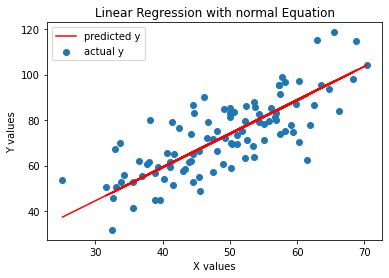

A: [[-0.1637988 ]
 [-0.10266812]
 [-0.2847115 ]
 [ 0.01306911]
 [-0.01262101]
 [-0.03370783]
 [ 0.02395156]
 [ 0.01028184]
 [ 0.04160327]
 [-0.06446327]
 [-0.12032347]
 [ 0.02066161]
 [-0.03331334]
 [-0.10666784]
 [-0.02491129]
 [-0.11706132]
 [ 0.16778256]
 [ 0.08170621]
 [-0.18645161]
 [-0.0055187 ]
 [-0.14048589]
 [ 0.21808841]
 [-0.12996141]
 [-0.10118992]
 [-0.0132377 ]
 [-0.13072957]
 [ 0.10665492]
 [ 0.01110797]
 [ 0.09904578]
 [ 0.08633864]
 [-0.13906075]
 [-0.11209354]
 [ 0.1383301 ]
 [ 0.10715727]
 [-0.10993109]
 [-0.00640654]
 [-0.13806343]
 [ 0.01757605]
 [ 0.08217869]
 [ 0.05069502]
 [-0.13236581]
 [-0.05519129]
 [ 0.08823277]
 [-0.03481411]
 [ 0.22040027]
 [-0.02762926]
 [-0.0534246 ]
 [ 0.08730676]
 [ 0.02623736]
 [-0.02157428]
 [ 0.23768387]
 [-0.00739336]
 [ 0.05495701]
 [ 0.03555575]
 [-0.02150469]
 [-0.10347749]
 [ 0.17884908]
 [-0.05939724]
 [ 0.11946052]
 [-0.0145215 ]
 [ 0.00755668]
 [-0.04402643]
 [ 0.08604918]
 [-0.15066096]
 [ 0.20122685]
 [-0.13663018]
 [ 0.02

In [4]:
B = (X.T.dot(Y) - Y_average.T.dot(X)) / (X.T.dot(X) - X_average.T.dot(X))
A = Y_average - X_average.dot(B)
Y_pred = A + X.dot(B)

plot_linear_regression(X, Y, Y_pred, "Linear Regression with normal Equation")
print(f"A: {A}")
print(f"B: {B}")

## Exercise 1b Gradient Descent

In [5]:
l = 0.0001
epochs = 100
m = np.zeros((1))
c = np.zeros(1)


In [6]:
for i in range(epochs):
    y_pred = m * X + c
    D_m = (-2/n) * sum(X.T.dot((Y - y_pred)))
    D_c = (-2/n) * sum(Y - y_pred)
    m = m - l * D_m
    c = c - l * D_c

print(f"D_c: {D_c}")
print(f"m: {m}, c: {c}")
y_pred = m * X + c

D_c: [-0.6004989]
m: [1.47880272], c: [0.03507497]


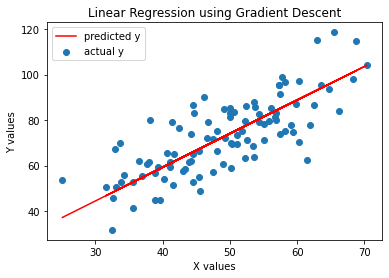

In [7]:
plot_linear_regression(X, Y, y_pred, "Linear Regression using Gradient Descent")

## Exercise 2 

In [8]:
datapath = os.path.join('chicago_hotel_reviews.csv')
data = pd.read_csv(datapath,
                   index_col=0,
                   delimiter=',')

rating = data.rating

#x_train, x_test, y_train, y_test = train_test_split(data, rating, test_size=0.2, random_state=0)
x_train, x_test, y_train, y_test = train_test_split(data, rating, test_size=0.2)

review = FunctionTransformer(lambda x: x['review'], validate = False) #extract reviews

cv = CountVectorizer(stop_words='english', lowercase=True, ngram_range=(1,2))

linearReg = LinearRegression()

## Without feature selection

In [9]:
steps = [('review', review), ('vector', cv), ('classifier', linearReg)]
pipeline = Pipeline(steps,verbose=True)

pipeline.fit(x_train, y_train)

predicted = pipeline.predict(x_test)

print(f"mean square error: {mean_squared_error(y_test, predicted)}")

[Pipeline] ............ (step 1 of 3) Processing review, total=   0.0s
[Pipeline] ............ (step 2 of 3) Processing vector, total=   0.1s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
mean square error: 1.311626109708073


## With feature selection

In [10]:
newFea = SelectPercentile(f_regression, percentile=6)

pipeline = Pipeline([('text', review), ('vect', cv), 
                   ('feaSelect', newFea), ('clf', linearReg)])

pipeline.fit(x_train, y_train)
predicted = pipeline.predict(x_test)

print(f"mean square error: {mean_squared_error(y_test, predicted)}")

mean square error: 0.9505936217748454
